Vintage                           0
Trajectory                        0
LateralLength_FT              14824
TVD_FT                         4595
Formation                         0
First12MonthOil_BBL            5794
NearNeighborCount100dVZone    14025
MonthsToPeakProduction         5162
ProppantIntensity_LBSPerFT    14258
ProppantLoading_LBSPerGAL     14132
RawOperator                       0
Section                           0
Township                          0
Range                             0
dtype: int64
Vintage                       0
Trajectory                    0
LateralLength_FT              0
TVD_FT                        0
Formation                     0
First12MonthOil_BBL           0
NearNeighborCount100dVZone    0
MonthsToPeakProduction        0
ProppantIntensity_LBSPerFT    0
ProppantLoading_LBSPerGAL     0
RawOperator                   0
Section                       0
Township                      0
Range                         0
dtype: int64


,Vintage,Trajectory,LateralLength_FT,TVD_FT,Formation,First12MonthOil_BBL,NearNeighborCount100dVZone,MonthsToPeakProduction,ProppantIntensity_LBSPerFT,ProppantLoading_LBSPerGAL,RawOperator,Section,Township,Range,zscore,dummy_trajectory__HORIZONTAL
0,2012,HORIZONTAL,4734.0,7188.0,CODELL | NIOBRARA B2,412.0,0.0,1.0,528.0946,1.776406,KAISER FRANCIS OIL CO,33,015N,062W,0.995406,1
1,2017,HORIZONTAL,9779.0,8494.0,CODELL,64275.0,2.0,4.0,1060.5748,0.983050,KAISER FRANCIS OIL CO,31,016N,064W,0.094649,1
2,2018,HORIZONTAL,9402.0,8675.0,CODELL,81327.0,3.0,2.0,602.3277,1.460079,EOG RESOURCES INC,35,013N,065W,0.843441,1
4,2014,HORIZONTAL,8778.0,8064.0,CODELL,42012.0,0.0,3.0,686.2088,1.123258,KAISER FRANCIS OIL CO,9,015N,064W,0.671726,1
6,2018,HORIZONTAL,9356.0,8534.0,CODELL,40014.0,2.0,2.0,1198.3994,1.127336,KAISER FRANCIS OIL CO,31,016N,064W,0.376794,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24650,2016,HORIZONTAL,9252.0,7549.0,NIOBRARA,138221.0,11.0,4.0,1491.8362,1.269990,GREAT WESTERN OPERATING COMPANY LLC,34,001N,067W,0.977496,1
24651,2020,HORIZONTAL,7171.0,5576.0,NIOBRARA,47376.0,2.0,5.0,1634.5433,0.748317,WHITING OIL & GAS CORPORATION,30,010N,057W,1.269636,1
24655,2019,HORIZONTAL,9221.0,6278.0,NIOBRARA,87483.0,5.0,13.0,1504.6854,0.839485,VERDAD RESOURCES LLC,8,009N,059W,1.003800,1
24657,2018,HORIZONTAL,5933.0,7846.0,CODELL,59617.0,5.0,18.0,1078.0938,0.841345,PETROSHARE CORPORATION,3,001S,067W,0.130513,1


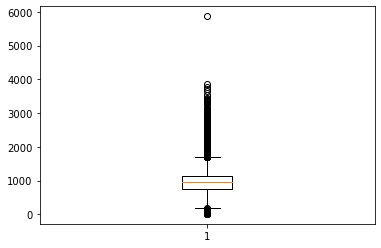

In [3]:
# Load libraries
# Load the following libraries:  numpy, pandas, pandas_profiling, pyplot, stats
import numpy as np
import pandas as pd
# from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from scipy import stats

# Read .csv into a dataframe called wells
wells = pd.read_csv("../data/enverus_data.csv", low_memory=False)

# Select this subset of features into wells_filtered:  "Vintage", "Trajectory","LateralLength_FT","TVD_FT","Formation","First12MonthOil_BBL","NearNeighborCount100dVZone","MonthsToPeakProduction","ProppantIntensity_LBSPerFT","ProppantLoading_LBSPerGAL","RawOperator","Section","Township","Range"
wells_filtered = wells[[ "Vintage", "Trajectory","LateralLength_FT","TVD_FT","Formation","First12MonthOil_BBL","NearNeighborCount100dVZone","MonthsToPeakProduction","ProppantIntensity_LBSPerFT","ProppantLoading_LBSPerGAL","RawOperator","Section","Township","Range"]].copy()

# Data cleaning - remove missing values
print(wells_filtered.isnull().sum())
wells_filtered.dropna(inplace=True)
print(wells_filtered.isnull().sum())

# Data cleaning - examine outliers
plt.boxplot(wells_filtered["ProppantIntensity_LBSPerFT"])

# Data cleaning - replace outliers
median = wells['ProppantIntensity_LBSPerFT'].median()
wells_filtered["zscore"] = np.abs(stats.zscore(wells_filtered["ProppantIntensity_LBSPerFT"]))
wells_filtered["ProppantIntensity_LBSPerFT"] = np.where(wells_filtered["zscore"] >=3, median,wells_filtered['ProppantIntensity_LBSPerFT'])

# Measuring correlation

# Create dummy variables for Trajectory
trajectory_dummies = pd.get_dummies(wells_filtered["Trajectory"],prefix="dummy_trajectory_")
wells_final = pd.concat([wells_filtered,trajectory_dummies], axis = 1)

wells_final





In [4]:
# import additional libraries: tpot regressor, test_train_split, accuracy score, label encoder
from tpot import TPOTRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [6]:
# Slice data model with the following columns: "Vintage","LateralLength_FT","TVD_FT","First12MonthOil_BBL","NearNeighborCount100dVZone","MonthsToPeakProduction","ProppantIntensity_LBSPerFT","ProppantLoading_LBSPerGAL","dummy_trajectory__HORIZONTAL"
wells_filtered = wells_final[["Vintage","LateralLength_FT","TVD_FT","First12MonthOil_BBL","NearNeighborCount100dVZone","MonthsToPeakProduction","ProppantIntensity_LBSPerFT","ProppantLoading_LBSPerGAL","dummy_trajectory__HORIZONTAL"]]

In [7]:
# Create test/train split
feature_list = list(wells_filtered[["Vintage","TVD_FT","First12MonthOil_BBL","NearNeighborCount100dVZone","MonthsToPeakProduction","ProppantIntensity_LBSPerFT","ProppantLoading_LBSPerGAL","dummy_trajectory__HORIZONTAL"]].columns)

# converting to numpy array for training
labels = np.array(wells_filtered['LateralLength_FT'])

features = np.array(wells_filtered[feature_list])

#labels = np.array(wellsFiltered[["First12MonthOil_BBL"]])

# split your data
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.10, random_state=42)

In [8]:
# Build tpot regressor with five generations, population_size = 50, verbosity = 2, random_state = 42
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)

In [9]:
# Fit model
tpot.fit(features_train, labels_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.7500000000000001, min_samples_leaf=11, min_samples_split=9, n_estimators=100)


TPOTRegressor(generations=5, population_size=50, random_state=42, verbosity=2)

In [ ]:
# Score model
print(tpot.score(features_test, labels_test))


In [ ]:
# Save pipeline
tpot.export('model_lateral_length.py')